In [3]:
import pandas as pd
import numpy as np

In [4]:
file='C:/Users/patel/Downloads/weather.csv'

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [6]:
df=pd.read_csv(file, encoding ='ascii')

In [7]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [8]:
#checking for null values
df.isnull().values.any()

False

In [9]:
#NO NaN values in the dataframe

In [10]:
#Converting the string values of weather into binary values
pd.get_dummies(df['weather'])

,drizzle,fog,rain,snow,sun
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1456,0,0,1,0,0
1457,0,0,1,0,0
1458,0,1,0,0,0
1459,0,0,0,0,1


In [11]:
#concatanating binary weather columns into the dataframe
df = pd.concat([df, pd.get_dummies(df['weather'])], axis=1)

In [12]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
0,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0
1,10.9,10.6,2.8,4.5,rain,0,0,1,0,0
2,0.8,11.7,7.2,2.3,rain,0,0,1,0,0
3,20.3,12.2,5.6,4.7,rain,0,0,1,0,0
4,1.3,8.9,2.8,6.1,rain,0,0,1,0,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:xlabel='weather', ylabel='precipitation'>

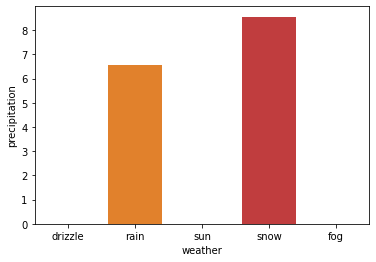

In [14]:
sb.barplot(x=df.weather,y=df.precipitation,ci=None)

<AxesSubplot:xlabel='weather', ylabel='wind'>

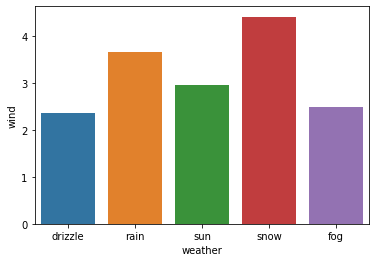

In [15]:
sb.barplot(x=df.weather,y=df.wind,ci=None)

<AxesSubplot:xlabel='weather', ylabel='temp_max'>

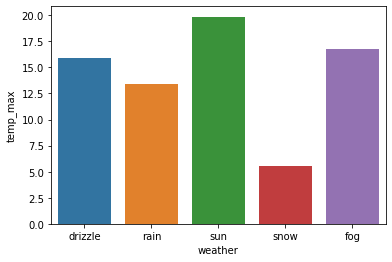

In [16]:
sb.barplot(x=df.weather,y=df.temp_max,ci=None)

<AxesSubplot:xlabel='weather', ylabel='temp_min'>

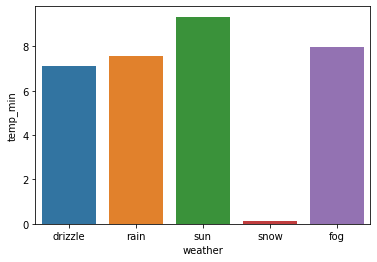

In [17]:
sb.barplot(x=df.weather,y=df.temp_min,ci=None)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df[['precipitation','wind','temp_max','temp_min']]
y=df['weather']

In [20]:
#performing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [21]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (949, 4)
X_test dimension=  (512, 4)
y_train dimension=  (949,)
y_train dimension=  (512,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [23]:
#initializing the model-using Multinomial Classification
model=LogisticRegression(multi_class='multinomial')


In [24]:
#fitting the data in model
model.fit(X_train, y_train)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [25]:
#predicting on test data
y_pred = model.predict(X_test)

In [29]:
#saving model to disk using pickle
import pickle

In [31]:
pickle.dump(model,open("model.pkl","wb"))